<a href="https://colab.research.google.com/github/JMML2021/0301_visualitzaci-_explorat-ria/blob/main/S03_T01_Visualitzaci%C3%B3_gr%C3%A0fica_d'un_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectiu general: 

Entendre i aplicar les diferents tècniques de visualització amb Python  
Objectius específics: 

Conèixer les diferents llibreries Matplotlib i Seaborn
Si algun recurs de towardsdatascience o medium demana registre, proveu d’obrir-lo en finestra d’incògnit.

# Ejercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

Una variable categòrica (UniqueCarrier)
Una variable numèrica (ArrDelay)
Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
Dues variables numèriques (ArrDelay i DepDelay)
Tres variables (ArrDelay, DepDelay i UniqueCarrier)
Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [165]:
!pwd          # El comando pwd (de las siglas en inglés print working directory, cuya traducción sería imprimir directorio de trabajo) se utiliza para imprimir el nombre

/content


In [166]:
# !pip install automl

In [167]:
#from goolge.colab import drive
#drive mount('/content/gdriven')

In [168]:
!ls
# https://www.youtube.com/watch?v=SDaC2bLKrFg

 boxplot_chat.png
'D:\Documentos D\GitHub'$'\030''1_visualitzaci-_explorat-ria\MMMM.jpg'
 DelayedFlights.csv
 gdrive
 histogram_chat.png
 pie_chart.png
 sample_data
 scatterplot_chat.png
 violin_chat.png


In [169]:
# Despues me interesará tener codificado AirTime en multiplos de 60 minutos
df['codAirTime'] = round((df.AirTime/60),0)*60


In [170]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/roberthryniewicz/datasets/master/airline-dataset/flights/flights.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


Cargo la informacion del dataset de aquí:


---
*https://github.com/mdrilwan/datasets*

#Una variable categòrica (UniqueCarrier)

In [171]:
# Hago listado de las compañías.

dfUniqueCarrier = df.UniqueCarrier.unique()
dfUniqueCarrier



array(['WN', 'XE'], dtype=object)

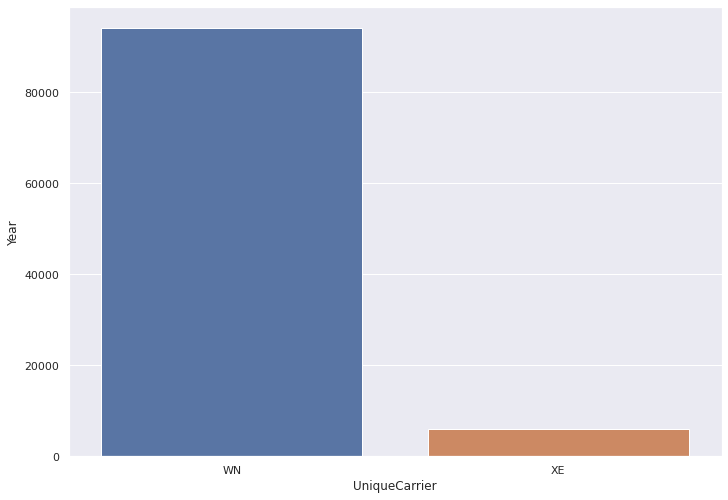

In [172]:
# Cuento las compañias que hay y la frecuencai con que se repite:
df2= df.groupby(df['UniqueCarrier']).count()
df2 = df2.rename_axis('UniqueCarrier').reset_index()
df2

sns.set_style('darkgrid')
sns.barplot(x = "UniqueCarrier", y = "Year", data = df2)
plt.show()

Text(0.5, 1.0, 'Porcentaje en el nº de vuelos de las 2 compañías')

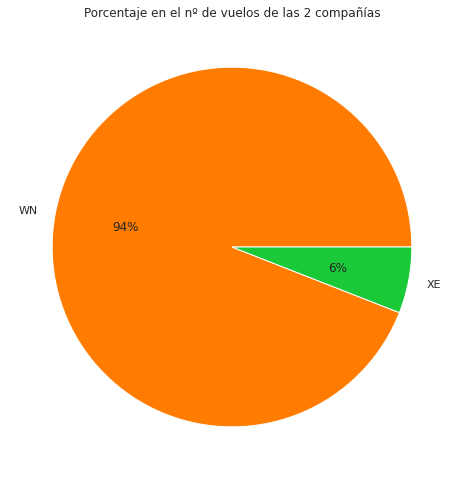

In [173]:
#define Seaborn color palette to use
 
colors = sns.color_palette('bright')[1:5] 

plt.pie(df2.Year, labels= df2.UniqueCarrier , autopct='%.0f%%', colors=colors )
plt.title('Porcentaje en el nº de vuelos de las 2 compañías')

# Una variable numèrica (ArrDelay)

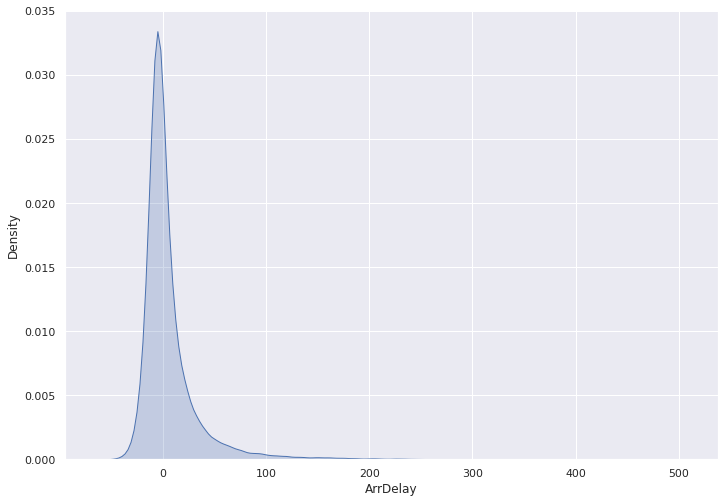

In [174]:
sns.kdeplot(df.ArrDelay, shade = True)
#sns.kdeplot(df.ArrDelay, cumulative=True)

Veo que la distribución **no es normal** y que hay muchos atípicos o outliers. Reduzco a unos valores de retraso que "yo" considero como normales (hora y media máximo)

# Dues variables numèriques (ArrDelay i DepDelay)

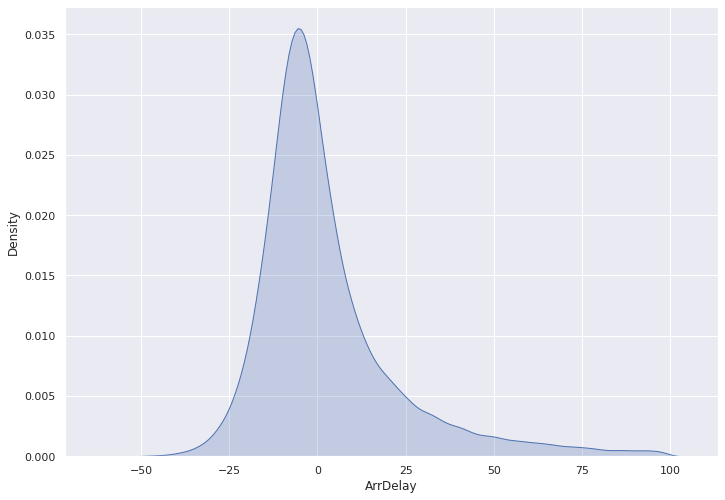

In [175]:
df3= df[df.ArrDelay < 100]
sns.kdeplot(df3.ArrDelay, shade = True)

**Dues variables numèriques (ArrDelay i DepDelay)**

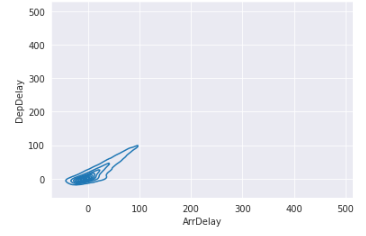

In [176]:
# sns.kdeplot(df.ArrDelay, df.DepDelay)
print('Lo bloqueo pq tarda mucho en representar')

Lo bloqueo pq tarda mucho en representar


**Tres variables (ArrDelay, DepDelay i UniqueCarrier)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


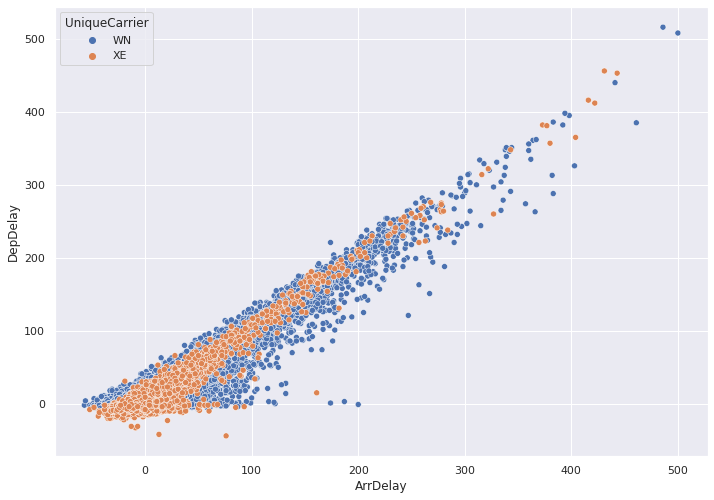

In [177]:
sns.scatterplot(df.ArrDelay, df.DepDelay, hue= df.UniqueCarrier)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


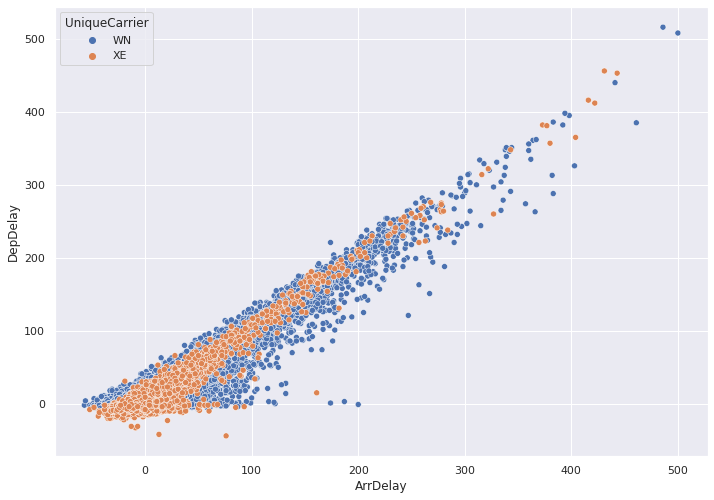

In [178]:
# limito a 2 compañias unicamente
df4= df[(df.UniqueCarrier =='WN') | (df.UniqueCarrier =='XE')]

df4

sns.scatterplot(df.ArrDelay, df.DepDelay, hue= df.UniqueCarrier)

Se ve una correlacion de a mas retraso en la partida hay mas retraso en la llegada

# Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


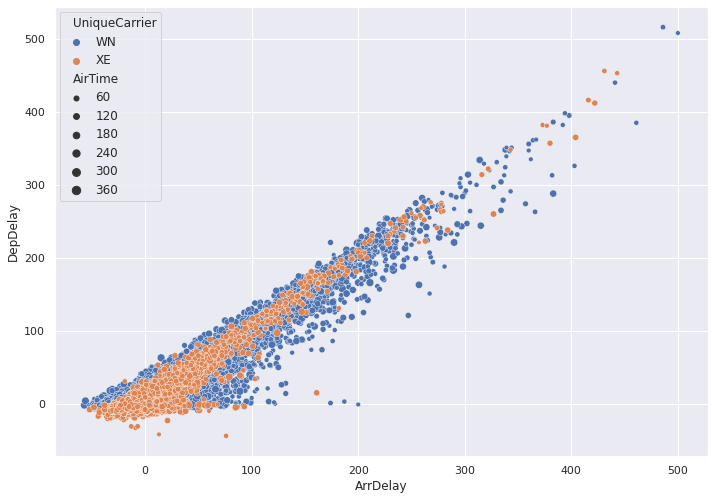

In [179]:
sns.scatterplot(df.ArrDelay, df.DepDelay, hue= df.UniqueCarrier, size=df.AirTime)

Una variable categòrica (UniqueCarrier) Una variable numèrica (ArrDelay) Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier) 

**Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier) **

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


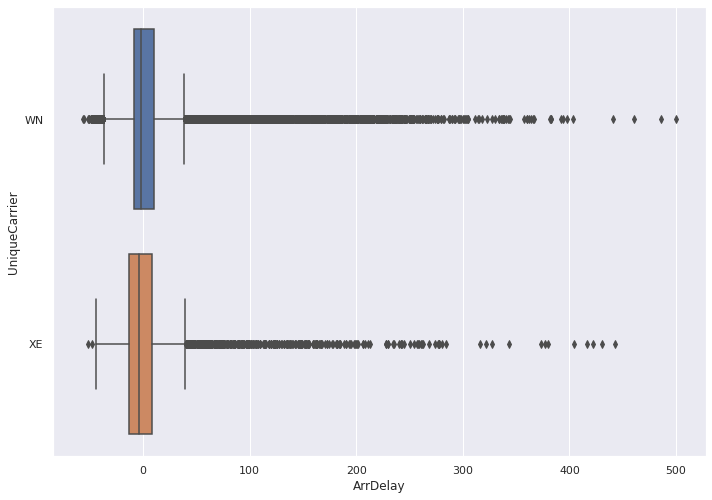

In [180]:
sns.boxplot(df.ArrDelay, df.UniqueCarrier)

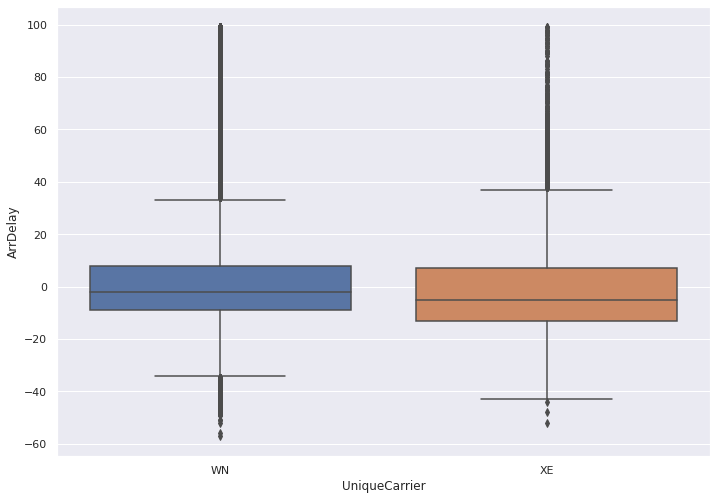

In [181]:
#sns.boxplot(df3.ArrDelay, df3.UniqueCarrier)

sns.boxplot(data =df3, y= 'ArrDelay', x= 'UniqueCarrier')
plt.savefig('boxplot_chat.png')

Vemos que hay muchos outlier y no permiten ver que pasa. Filtro los datos

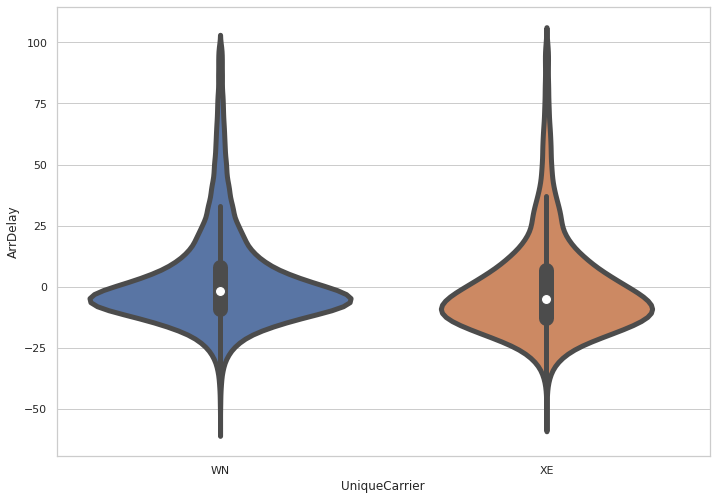

In [182]:
sns.set_style('whitegrid')
sns.violinplot(data = df3, y='ArrDelay', x='UniqueCarrier', linewidth=5)
plt.savefig('violin_chat.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


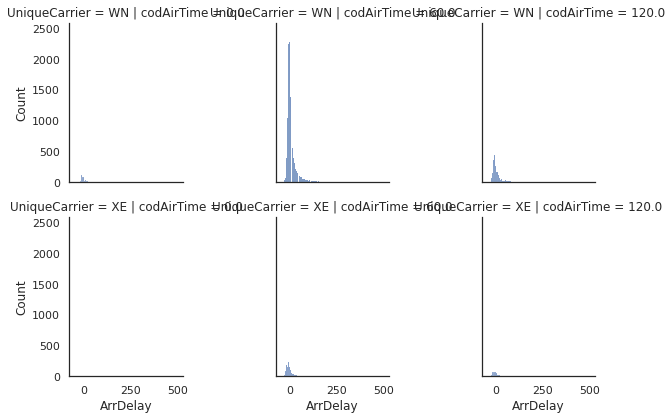

In [184]:
sns.set_style('white')
df3= df[df.AirTime < 100]

# Codifico la variable continua Airtime ..... y la discretizo
df3['codAirTime']= round((df3['AirTime']/60),0)*60
 
g = sns.FacetGrid(df3, col ='codAirTime' , row ='UniqueCarrier' )
g.map(sns.histplot, 'ArrDelay' );

Vemos que cuanto el **AirTime** es mayor el delay disminuye, que con el otro gráfico no lo podíamos ver

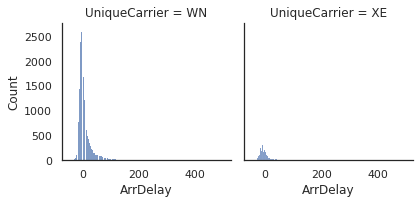

In [185]:
g = sns.FacetGrid(df3, col = 'UniqueCarrier')
g.map(sns.histplot, 'ArrDelay' );
plt.savefig('histogram_chat.png')

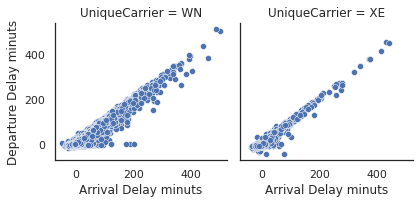

In [186]:
g = sns.FacetGrid(df3, col = 'UniqueCarrier', palette ='prism')
g.map_dataframe(sns.scatterplot, x= 'ArrDelay' , y = 'DepDelay' )
g.set_axis_labels('Arrival Delay minuts', 'Departure Delay minuts')

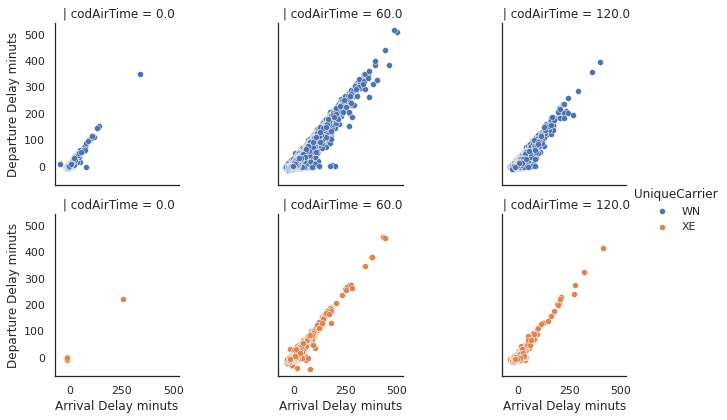

In [187]:
g = sns.FacetGrid(df3, col ='codAirTime' , row= 'UniqueCarrier', hue= 'UniqueCarrier')
g.map_dataframe(sns.scatterplot, x= 'ArrDelay' , y = 'DepDelay' )
g.set_axis_labels('Arrival Delay minuts', 'Departure Delay minuts')
g.add_legend()
g.set_titles(row_template ='')

plt.savefig('scatterplot_chat.png')


# - Exercici 2
Exporta els gràfics com imatges o com html.

Se utliza la instrucción

In [188]:
plt.savefig("XXXXXXXX.jpg")

<Figure size 842.4x595.44 with 0 Axes>

#Exercici 3
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.

In [189]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [190]:
url= '/content/DelayedFlights.csv'
df = pd.read_csv(url)
df.head(1)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [191]:
y = df.UniqueCarrier.value_counts()

labels = y.index

In [192]:
#explode will make some wedge in our chart. it will be helpful to highlight some parts of the chart

explode = [i/24 for i in range(3,len(y)+3)]
for x in explode[0:17]:
    explode[explode.index(x)]=0   #using just the last 3 elements
explode[-1] = 1.2     

In [193]:
#here will define map of colors for our plotp

normdata = mpl.colors.Normalize(min(y), max(y))  
colormap = mpl.cm.Blues #this line allows us to change the colors
colors =colormap(normdata(y))

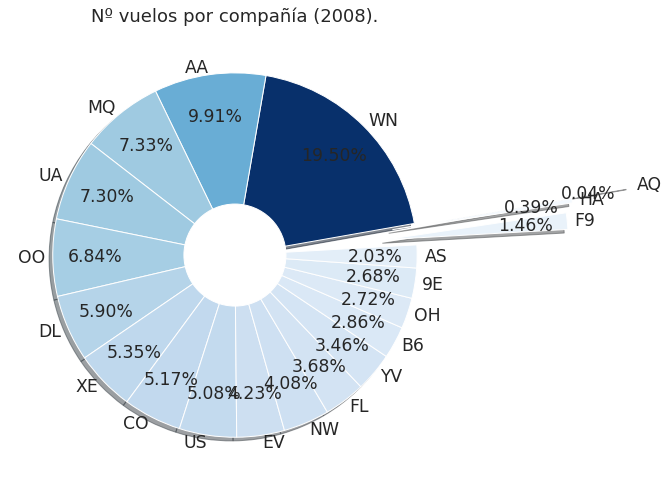

In [200]:
#ploting a pie chart

fig1, ax1 = plt.subplots(figsize=(10,12))

ax1.pie(y, explode=explode, labels=labels, autopct='%.2f%%',pctdistance=0.77,labeldistance=1.04,
        shadow=True, startangle=10, colors=colors,
       textprops={'size': 'x-large'})


ax1.set_title("Nº vuelos por compañía (2008).",fontsize=18)

#plt.legend(title = "Aerolinea:",labels=labels,loc="best")


#draw inner circle
centre_circle = plt.Circle((0,0),.28,fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)


plt.tight_layout()

plt.savefig('pie_chart.png') #save it

plt.show()

**Dibujo la cantidad de vuelos que ha hecho cada compañía en el 2008**

In [195]:
df2= df.groupby(df['UniqueCarrier']).count()
df2 = df2.rename(columns={'Unnamed: 0': 'cantidadVuelos'})
df2= df2.rename_axis('UniqueCarrier').reset_index()
df2.head(2)

,UniqueCarrier,cantidadVuelos,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,9E,51885,51885,51885,51885,51885,51885,51885,51617,51885,...,51617,51843,51885,51885,51885,35631,35631,35631,35631,35631
1,AA,191865,191865,191865,191865,191865,191865,191865,191062,191865,...,191062,191831,191865,191865,191865,132257,132257,132257,132257,132257


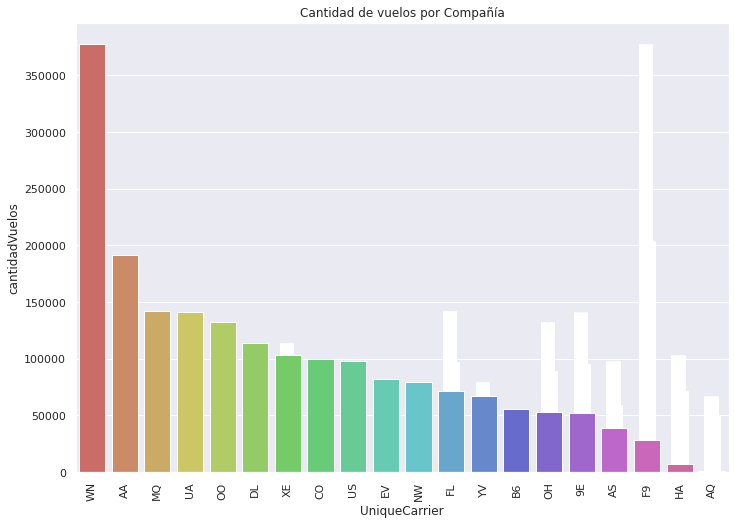

In [196]:

#fig1, ax1 = plt.subplots(figsize=(10,12))
sns.set(rc={'figure.figsize':(11.7,8.27)})
df2.plot(kind='bar')


# ordeno y creo un grafico de barras.

df2 = df2.sort_values(by='cantidadVuelos', ascending=False)
plt.legend([],[], frameon=False)
#plt.legend(title = "Airline code:",labels=labels,loc="best")

#ax1.set_title("Percentage of Annual Flights by Airline (2008).",fontsize=18)
plt.title('Cantidad de vuelos por Compañía')
sns.barplot(x = "UniqueCarrier", y = "cantidadVuelos", palette="hls", data = df2)

In [197]:
# Me quedo con las variables importantes

delays_df = df [["ArrDelay", "DepDelay"]]

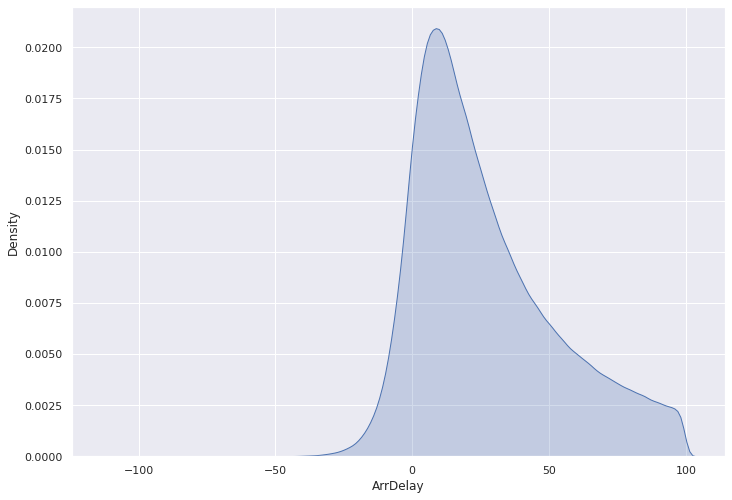

In [198]:
# Quito las filas  con  NaN values

delays_df = delays_df.dropna().reset_index(drop=True)

# quito los outliers
delays_df= delays_df[delays_df.ArrDelay < 100]


# Reduzco el tamaño de la muestar a 10000 lineas.
delays_df.sample = delays_df.sample(10000)

sns.kdeplot(delays_df.ArrDelay, shade = True)

(-50.0, 105.0)

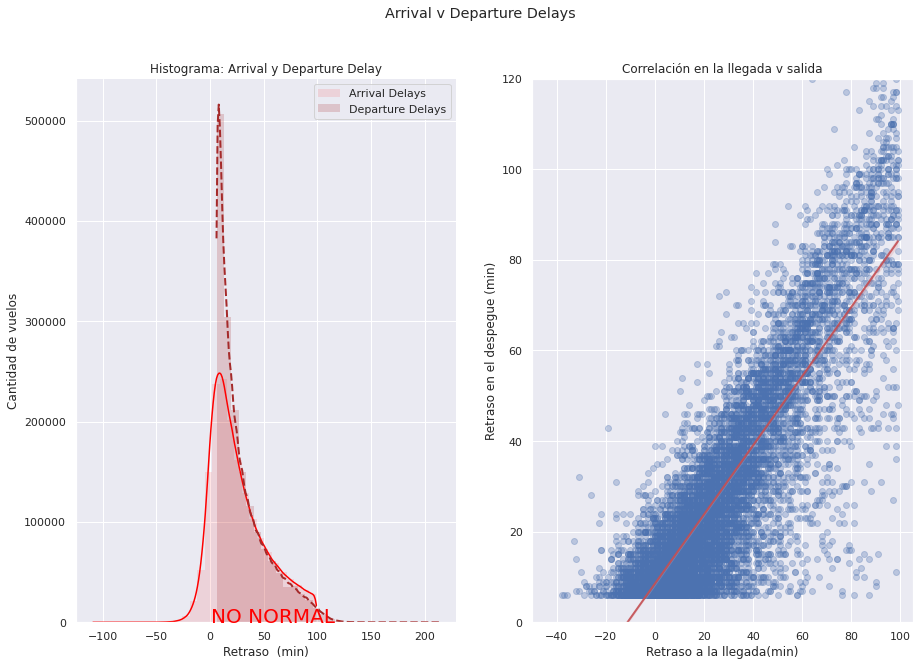

In [202]:
fig, axes = plt.subplots(1,2,figsize=(15,10))
fig.suptitle("Arrival v Departure Delays")

sns.histplot(delays_df["ArrDelay"], color="red", label="Arrival Delays", kde=True, linewidth=0,bins=30,\
           alpha=0.1,ax=axes[0])

sns.histplot(delays_df["DepDelay"],color="brown", label="Departure Delays", kde=True, linewidth=0,bins=30,\
            alpha=0.2, line_kws= {'color':'blue','linestyle': 'dashed','linewidth':2},ax=axes[0])


axes[0].set_title('Histograma: Arrival y Departure Delay')
axes[0].set_ylabel('Cantidad de vuelos')
axes[0].set_xlabel("Retraso  (min)")
axes[0].yaxis.grid(True)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].legend(loc="best")
# Anotacion 1
axes[0].text(0.55, 10, r"NO NORMAL", fontsize=20, color="red")

sns.regplot(x="ArrDelay", y="DepDelay", data=data, \
           line_kws={"color":"r","alpha":0.9,"lw":2},scatter_kws={'alpha':0.3},ax=axes[1])

axes[1].set_ylabel('Retraso en el despegue (min)')
axes[1].set_xlabel("Retraso a la llegada(min)")
axes[1].set_title("Correlación en la llegada v salida")

#Limits of plot range from 2 hour early to 3 hours delayed

plt.ylim(-0,120)
plt.xlim(-50,105)

Conclusion:

Parece que existe una correlación.... pero puede serlo estadísticamente, pero no serlo "prácticamente" ... Habrá que hacer un **estudio de correlación de Pearson**